In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import time

# Загрузка данных
data = pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

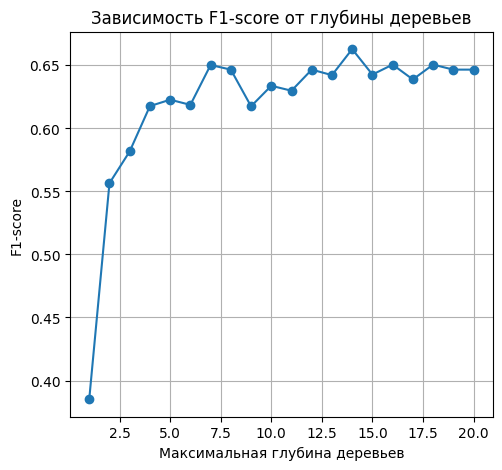

In [13]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Исследование зависимости качества от глубины деревьев
max_depths = range(1, 21)
f1_scores_depth = []

for depth in max_depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_scores_depth.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(max_depths, f1_scores_depth, marker='o')
plt.xlabel('Максимальная глубина деревьев')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины деревьев')
plt.grid(True)

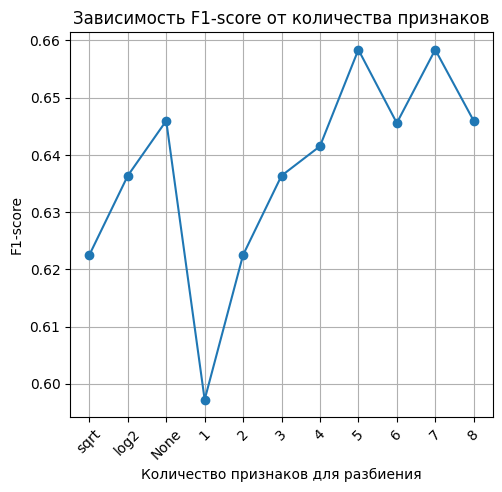

In [14]:
#Исследование зависимости качества от количества признаков
max_features_options = ['sqrt', 'log2', None] + list(range(1, X.shape[1]+1))
f1_scores_features = []

for feature_option in max_features_options:
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, 
                              max_features=feature_option, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_scores_features.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot([str(x) for x in max_features_options], f1_scores_features, marker='o')
plt.xlabel('Количество признаков для разбиения')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от количества признаков')
plt.xticks(rotation=45)
plt.grid(True)

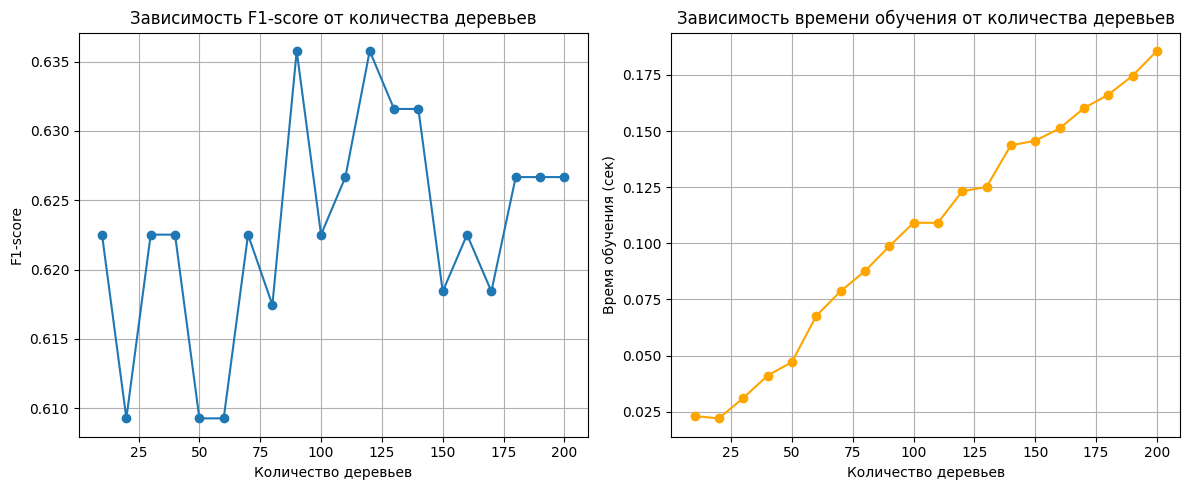

In [17]:
#Исследование зависимости качества от количества деревьев
n_estimators_range = range(10, 210, 10)
f1_scores_estimators = []
times_estimators = []

for n in n_estimators_range:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    f1_scores_estimators.append(f1_score(y_test, y_pred))
    times_estimators.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, f1_scores_estimators, marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от количества деревьев')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, times_estimators, marker='o', color='orange')
plt.xlabel('Количество деревьев')
plt.ylabel('Время обучения (сек)')
plt.title('Зависимость времени обучения от количества деревьев')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=3, objective='binary:logistic', reg_alpha=30, reg_lambda=80, booster='dart')
start = time.time()
bst.fit(X_train, y_train)
end = time.time()

y_pred = bst.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность: {acc}")
print(f"Время обучения: {end - start} секунд")

Точность: 0.7532467532467533
Время обучения: 0.0059964656829833984 секунд


In [ ]:
При исследовании с использованием xgboost, с учетом набора гиперпараметров, была получена хорошая точность за короткий промежуток времени, по сравнению с Random Forest. 
Однако RF показывает увеличение точности модели с ростом глубины и количества деревьев, но одновременно с этим растет и время обучения.